### 2017 전국 교통사고 데이터분석 및 시각화

In [47]:
import pandas as pd
import squarify as squarify# pieChart를 정사각형으로
import numpy as np
import matplotlib.pyplot as plt

# KR Font
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
rc('font', family = font_name)


In [25]:
data = pd.read_csv("Traffic_Accident_2017.csv", encoding ='euc-kr') 
data

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069
3,2017,2017010102,22,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,없음,없음,961608,1864573,127.069759,36.778505
4,2017,2017010104,37,야간,일,1,1,0,0,0,...,단일로,기타단일로,승용차,승용차,보행자,보행자,946778,1941695,126.898094,37.472946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,2017,2017123118,10,야간,일,1,4,1,0,2,...,단일로,기타단일로,화물차,화물차,화물차,화물차,1044531,1682838,127.988833,35.139774
4061,2017,2017123118,25,야간,일,1,1,0,0,0,...,단일로,기타단일로,원동기장치자전거,원동기장치자전거,없음,없음,1160683,1704380,129.267745,35.322087
4062,2017,2017123119,55,야간,일,1,1,0,0,0,...,단일로,기타단일로,화물차,화물차,없음,없음,1067639,1980346,128.268522,37.820351
4063,2017,2017123120,40,야간,일,1,11,1,9,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,961004,1987481,127.056525,37.886331


In [26]:
# 요일 별 사고 건수 count

#temp 생성

temp = data['요일'].value_counts()
temp

화    608
월    603
금    603
토    596
목    586
수    565
일    504
Name: 요일, dtype: int64

In [27]:
# 뒤죽박죽 series => y변수 생성 (for y axis)
y = temp[['월','화','수','목','금','토','일']] # <= index
y

월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: 요일, dtype: int64

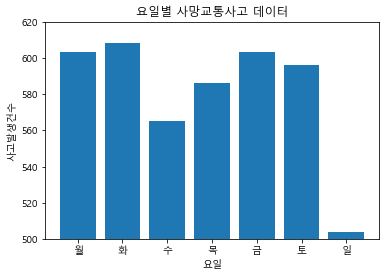

In [28]:
# bar chart 생성
x = y.index

plt.bar(x,y)


# Graph name
plt.xlabel('요일')
plt.ylabel('사고발생건수').set_rotation(90)
plt.title('요일별 사망교통사고 데이터')

plt.ylim(500,620)

plt.show()

In [29]:
# 차대차 사건 // 발생지시도 추출 

car = data[data['사고유형_대분류'] == '차대차']

#발생지시도 -> 사상자 추출 => sum

area = car[['발생지시도', '사상자수']].groupby('발생지시도').sum()
area



,사상자수
발생지시도,
강원,214
경기,824
경남,248
경북,287
광주,87
대구,115
대전,61
부산,107
서울,197


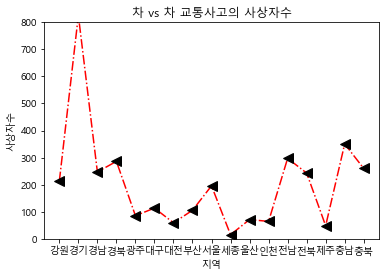

<Figure size 1440x1440 with 0 Axes>

In [30]:

# Line Chart 생성
x = area.index
y = area.values

plt.plot(x,y, c = 'r' , linestyle = '-.', marker = '<' ,mec = 'k', mfc = 'k', ms = 10)

# Graph name
plt.xlabel('지역')
plt.ylabel('사상자수').set_rotation(90)
plt.title('차 vs 차 교통사고의 사상자수')

# size
plt.ylim(0,800)
plt.figure(figsize=(20,20))


plt.show()

### Pie Chart
- 교통사고가 가장 많이 발생하는 시간대

In [31]:
# '발생년월일시'에서 시간 추출 (뒤 두자리)

# [Attempted Approach] 

# time = data['발생년월일시'].str[-1:-3].astype('int')

# time = data.발생년월일시.astype(str)
# time.str[8:].astype('int')


# [Corrected Approach]
time = data['발생년월일시']
time %= 100
time

0        1
1        2
2        2
3        2
4        4
        ..
4060    18
4061    18
4062    19
4063    20
4064    23
Name: 발생년월일시, Length: 4065, dtype: int64

In [33]:
# 0~2 3~5 6~8 9~11 12~14 15~17 18~20 21~23


bins = [-1,2,5,8,11,14,17,20,23]
labels = ['0~2', '3~5', '6~8', '9~11', '12~14', '15~17', '18~20', '21~23']
result = pd.cut(time,bins,labels = labels)

result


0         0~2
1         0~2
2         0~2
3         0~2
4         3~5
        ...  
4060    18~20
4061    18~20
4062    18~20
4063    18~20
4064    21~23
Name: 발생년월일시, Length: 4065, dtype: category
Categories (8, object): ['0~2' < '3~5' < '6~8' < '9~11' < '12~14' < '15~17' < '18~20' < '21~23']

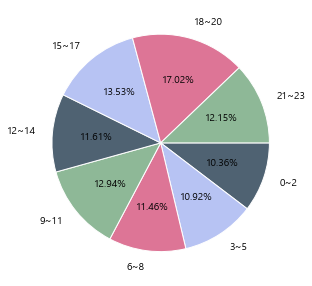

In [43]:
# Pie Chart 생성

# Check the numbers and sort by index
rs = result.value_counts().sort_index()
rs

# Create a pie chart
plt.figure(figsize=(5,5))

colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
plt.pie(rs,labels=labels,  autopct= '%1.2f%%', counterclock= False, labeldistance=1.15, 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors) # autopct = 소수점 두자리 1.2설정 or 소수점 한자리 1.1
plt.show()

In [3]:
# # libraries
# import matplotlib.pyplot as plt
# import squarify    # pip install squarify (algorithm for treemap)
# import pandas as pd

# # Create a data frame with fake data
# df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })

# # plot it
# squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
# plt.axis('off')
# plt.show()




!pip install squarify 